In [47]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [48]:
df = pd.read_csv("../data/synthetic_lifestyle_disease_transformed.csv")

In [49]:
features = df[['Age', 'Gender', 'BMI', 'Smoking', 'Alcohol',
       'ExerciseHours', 'SleepHours', 'DietScore', 'BloodPressure',
       'BloodSugar', 'Cholesterol']].values
target = df['DiseaseRisk'].values.reshape(-1,1)

In [50]:
x_train = features[:300000]
y_train = target[:300000]
x_test = features[300000:]
y_test = target[300000:]

In [51]:
class Logistic_Regressor:
    def __init__(self, max_iter=1000, alpha=0.001):
        self.iter = max_iter
        self.alpha = alpha

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x_train, y_train):
        ones = np.ones((x_train.shape[0], 1))
        x_train = np.hstack((ones, x_train))
        
        y_train = y_train.reshape(-1, 1)
        
        self.w = np.zeros((x_train.shape[1], 1))
        
        for _ in range(self.iter):
            y_pred = self.sigmoid(x_train @ self.w)
            grad = x_train.T @ (y_train - y_pred)
            self.w += self.alpha * grad / len(y_train)

    def predict(self, x_test):
        ones = np.ones((x_test.shape[0], 1))
        x_test = np.hstack((ones, x_test))
        
        y_pred = self.sigmoid(x_test @ self.w)
        return (y_pred >= 0.5).astype(int)
    
    def getCoeff(self):
        return self.w


In [55]:
model = Logistic_Regressor(1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
pred_arr = []
for x,y in zip(y_pred,y_test):
    pred_arr.append(np.bitwise_xor(x,y))
mse = np.mean(pred_arr)
print("Mean squared error:\n", mse)
print("Confusion Matrix:\n", mat)
print("Learned Weights:\n", model.getCoeff())

Mean squared error:
 0.2973
Confusion Matrix:
 [[136800   3518]
 [ 55942   3740]]
Learned Weights:
 [[ 0.02568939]
 [ 0.12026445]
 [ 0.01273473]
 [ 0.14860644]
 [ 0.00792905]
 [ 0.01043516]
 [ 0.11632141]
 [ 0.16309945]
 [ 0.11370246]
 [ 0.00207353]
 [-0.09770177]
 [-0.03712513]]


# compairing the sklearn model and model from scratch 

**sklearn model**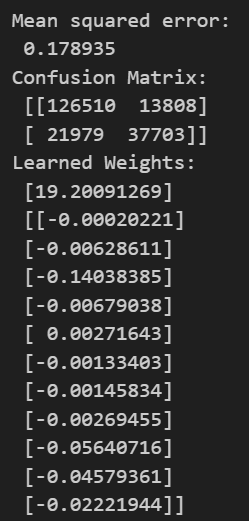**Our model**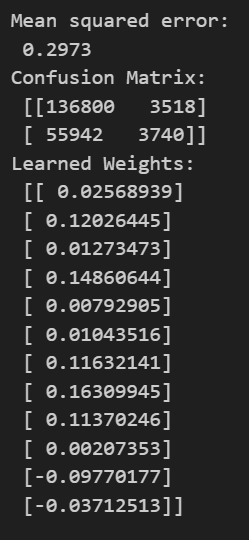